1-	How do fire occurrences vary across different months and years? Are there certain months or seasons with higher fire occurrences? Can we identify what were the larger fires?

In [1]:
#Import the dataset
import pandas as pd

# Load the data
file_path = 'Registos_Incendios_SGIF_2011_2020.xlsx'
df = pd.read_excel(file_path)

print(df.head())

  Codigo_SGIF  Codigo_ANEPC   Ano  Mes  Dia  Hora  AreaPov_ha  AreaMato_ha  \
0      DM2111           368  2011    1    1    17         0.0        0.010   
1      BL4112          1236  2011    1    9    22         0.0        0.000   
2      DM3111           820  2011    1   15    17         0.0        0.000   
3      BL2111          1977  2011    1   18    22         0.0        0.001   
4      DM2113          7930  2011    1   19    17         0.0        0.005   

   AreaAgric_ha  AreaTotal_ha  ...       ISI         DC       DMC       FFMC  \
0       0.00000       0.01000  ...  0.291930   4.092373  0.653638  54.525424   
1       0.00200       0.00200  ...  0.013831   1.835452  0.367371  32.001278   
2       0.00001       0.00001  ...  1.171990   9.658571  1.573768  74.889775   
3       0.00000       0.00100  ...  0.248910  12.477199  0.762519  51.102608   
4       0.00000       0.00500  ...  0.008092   3.968661  0.508191  32.290416   

        BUI  CodCausa     TipoCausa  \
0  0.934234

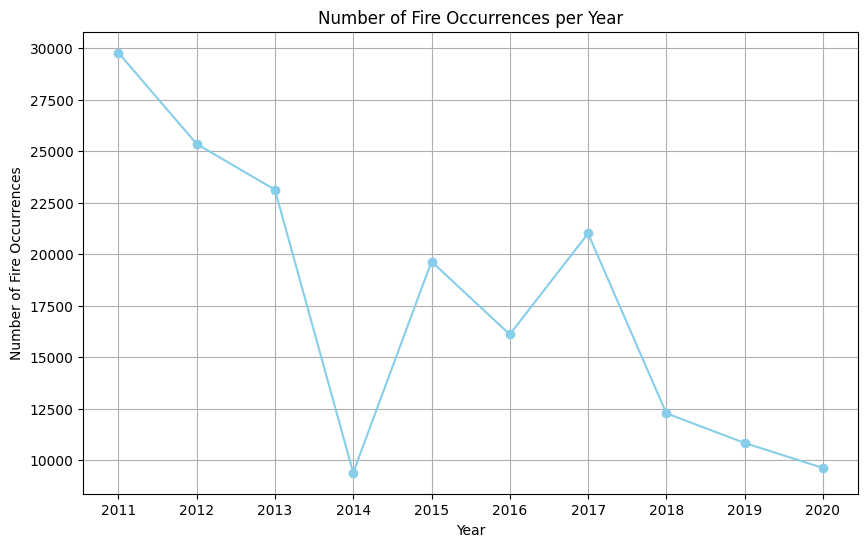

In [4]:
#Fire Ocurrences per Year
import matplotlib.pyplot as plt

#Count the number of fires per year
fires_per_year = df.groupby('Ano').size()

#Extract all unique years from the dataset
years = df['Ano'].unique()

#Plot the fires per year
plt.figure(figsize=(10, 6))
fires_per_year.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Fire Occurrences')
plt.title('Number of Fire Occurrences per Year')
plt.xticks(ticks=years)
plt.grid(True)
plt.show()

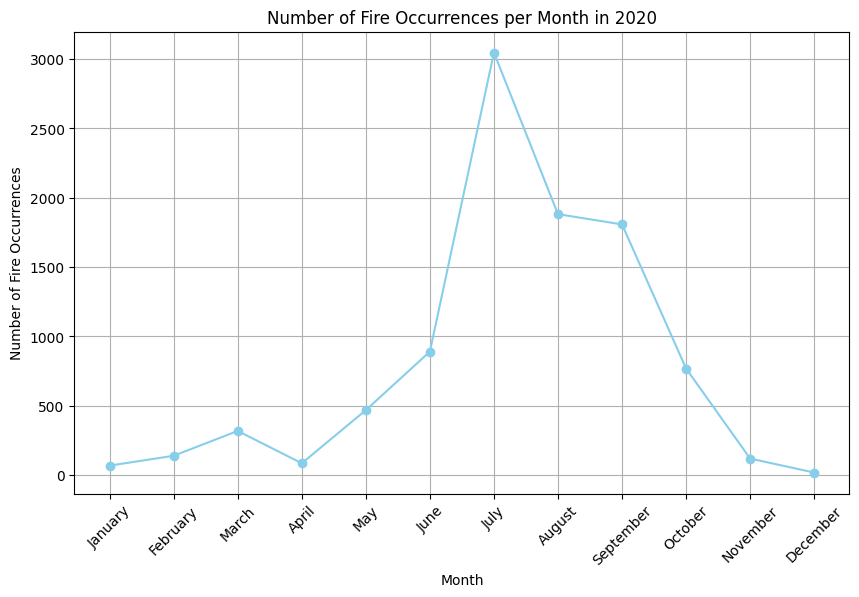

In [5]:
#Fire Ocurrences per month in a certain year
import matplotlib.pyplot as plt
import calendar

# Define a specific year to analyze
specific_year = 2020

# Filter data for the specific year
df_specific_year = df[df['Ano'] == specific_year]

# Count the number of fire occurrences per month for the specific year
fires_per_month_specific_year = df_specific_year['Mes'].value_counts().sort_index()

# Ensure all months (1 to 12) are included
all_months = range(1, 13)
fires_per_month_specific_year = fires_per_month_specific_year.reindex(all_months, fill_value=0)

# Get month names
month_names = [calendar.month_name[i] for i in all_months]

# Plot the number of fire occurrences per month for the specific year using a line plot
plt.figure(figsize=(10, 6))
fires_per_month_specific_year.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Fire Occurrences')
plt.title(f'Number of Fire Occurrences per Month in {specific_year}')
plt.xticks(ticks=all_months, labels=month_names, rotation=45)
plt.grid(True)
plt.show()

In [6]:
#Fire Occurrences per month for all the years (Interactive plot)
import plotly.graph_objects as go
import calendar

# Pivot the table to get months as columns and years as rows
fires_per_month_year = df.pivot_table(index='Ano', columns='Mes', values='Codigo_SGIF', aggfunc='size', fill_value=0)

# Get month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Create an interactive plot
fig = go.Figure()

for year in fires_per_month_year.index:
    fig.add_trace(go.Scatter(
        x=month_names,
        y=fires_per_month_year.loc[year],
        mode='lines+markers',
        name=str(year)
    ))

fig.update_layout(
    title='Number of Fire Occurrences per Month for Each Year',
    xaxis_title='Month',
    yaxis_title='Number of Fire Occurrences',
    xaxis=dict(tickmode='array', tickvals=month_names),
    yaxis=dict(rangemode='tozero'),
    legend_title='Year',
    hovermode='x unified'
)

fig.show()
